## Exploring Dataset

some steps to follow:
- Introduce the dataset. 
- Systematically walk through the points of exploration that you conducted.
- You should have headers and text that organize your thoughts and findings.
- Don’t forget to export the notebook as an html file for the project submission.

##### Create your Slide Deck Later: this is where Explanation comes in.


For now, I should start  a clear understanding of the data. 

In [1]:
# all needed libraries imported here 
import pandas as pd
import numpy as np 
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

%matplotlib inline

In [2]:
#read and combine using glob.glob()
all_filenames = [i for i in glob.glob('Data\*.csv')]


In [3]:
#read all csv files in one dataset
df = pd.concat([pd.read_csv(file, dtype ={'rental_access_method': object, 'bike_share_for_all_trip' : object } ) for file in all_filenames], ignore_index=True)


In [4]:
#df.to_csv( "full_fordgobike-tripdata.csv", index=False)


##### Now, I would like to check for existing quality issues and tidiness issues and fix them if possible 

##### Quality issues:
- There are some missing values in the following columns = {'start_station_id', 'start_station_name', 'end_station_id', 'end_station_name', 'bike_share_for_all_trip', 'rental_access_method' }
- Data columns={start_time and end_time} have faulty datatypes because they should have been date values 
- start_station_id and end_station_id both have missing values and wrong datatypes 
- 

In [5]:
df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74.0,Laguna St at Hayes St,37.776435,-122.426244,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,NaN,NaN
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96.0,Dolores St at 15th St,37.766210,-122.426614,88,Customer,NaN,NaN
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245.0,Downtown Berkeley BART,37.870348,-122.267764,245.0,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60.0,8th St at Ringold St,37.774520,-122.409449,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,NaN,NaN
5,9226,2017-12-31 22:51:00.9180,2018-01-01 01:24:47.1660,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,1487,Customer,NaN,NaN
6,4507,2017-12-31 23:49:28.4220,2018-01-01 01:04:35.6190,259.0,Addison St at Fourth St,37.866249,-122.299371,259.0,Addison St at Fourth St,37.866249,-122.299371,3539,Customer,NaN,NaN
7,4334,2017-12-31 23:46:37.1960,2018-01-01 00:58:51.2110,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,1503,Customer,NaN,NaN
8,4150,2017-12-31 23:37:07.5480,2018-01-01 00:46:18.3080,20.0,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,20.0,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,3125,Customer,NaN,NaN
9,4238,2017-12-31 23:35:38.1450,2018-01-01 00:46:17.0530,20.0,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,20.0,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,2543,Customer,NaN,NaN


In [6]:
df.tail(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
4890394,2336,2019-12-28 14:49:19,2019-12-28 15:28:15,NaN,NaN,37.809270,-122.475899,NaN,NaN,37.829645,-122.483233,551068,Subscriber,NaN,app
4890395,2297,2019-12-28 14:49:17,2019-12-28 15:27:34,NaN,NaN,37.809275,-122.475875,NaN,NaN,37.829634,-122.483242,593917,Subscriber,NaN,app
4890396,1816,2019-12-27 17:58:23,2019-12-27 18:28:40,NaN,NaN,37.809291,-122.414682,NaN,NaN,37.776921,-122.419472,326273,Subscriber,NaN,app
4890397,687,2019-12-24 18:21:20,2019-12-24 18:32:47,NaN,NaN,37.809576,-122.412358,NaN,NaN,37.807259,-122.410570,607037,Customer,NaN,app
4890398,711,2019-12-24 18:21:41,2019-12-24 18:33:33,NaN,NaN,37.809578,-122.412348,NaN,NaN,37.807330,-122.410621,167109,Customer,NaN,app
4890399,731,2019-12-28 18:37:29,2019-12-28 18:49:40,NaN,NaN,37.809731,-122.409855,NaN,NaN,37.807573,-122.421681,719651,Subscriber,NaN,app
4890400,748,2019-12-28 18:37:24,2019-12-28 18:49:53,NaN,NaN,37.809768,-122.409797,NaN,NaN,37.807558,-122.421638,655411,Subscriber,NaN,app
4890401,1044,2019-12-26 14:25:37,2019-12-26 14:43:02,NaN,NaN,37.810183,-122.410271,NaN,NaN,37.807225,-122.408850,936881,Subscriber,NaN,app
4890402,326,2019-12-30 20:35:43,2019-12-30 20:41:09,NaN,NaN,37.810471,-122.417386,NaN,NaN,37.803143,-122.414373,397539,Subscriber,NaN,app
4890403,4023,2019-12-31 19:26:48,2019-12-31 20:33:52,NaN,NaN,37.811042,-122.418149,NaN,NaN,37.810970,-122.418054,662304,Subscriber,NaN,app


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4890404 entries, 0 to 4890403
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
 14  rental_access_method     object 
dtypes: float64(6), int64(2), object(7)
memory usage: 559.7+ MB


In [8]:
df.isnull().sum()

duration_sec                     0
start_time                       0
end_time                         0
start_station_id             92505
start_station_name           91904
start_station_latitude           0
start_station_longitude          0
end_station_id               94673
end_station_name             94121
end_station_latitude             0
end_station_longitude            0
bike_id                          0
user_type                        0
bike_share_for_all_trip     762959
rental_access_method       4769566
dtype: int64

***First, we will start by exploring the missing data. We will check out the missing data in rental_access_method.***

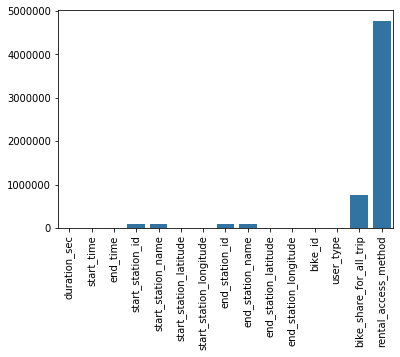

In [9]:
null_count = df.isnull().sum()
base_color = sb.color_palette()[0]
sb.barplot(null_count.index.values, null_count, color = base_color)
plt.xticks(rotation = 90);

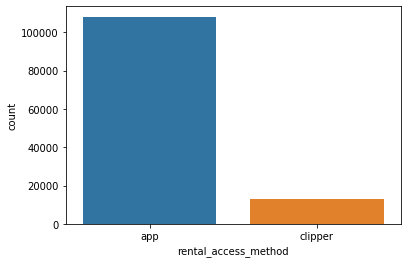

In [10]:
null_counts = df['rental_access_method']
base_color = sb.color_palette()
sb.countplot(data = df, x='rental_access_method')
#plt.legend()

***Data columns={start_time and end_time} have faulty datatypes because they should have been date values***

*Define*
- we can correct the datatype through the following code

*Code*

In [11]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

*Test*

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4890404 entries, 0 to 4890403
Data columns (total 15 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         float64       
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           float64       
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  int64         
 12  user_type                object        
 13  bike_share_for_all_trip  object        
 14  rental_access_method     object        
dtypes: datetime64[ns](2), float64(6), int64(2), object(5)
memory usage: 559.7+ MB


##### There are some missing values in the following columns = {'rental_access_method' }

*Define*

- you can start by removing the ebtire column because

*Code*

In [13]:
df.drop(columns ={'rental_access_method'}, axis = 1, inplace = True )

*Test*

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4890404 entries, 0 to 4890403
Data columns (total 14 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         float64       
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           float64       
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  int64         
 12  user_type                object        
 13  bike_share_for_all_trip  object        
dtypes: datetime64[ns](2), float64(6), int64(2), object(4)
memory usage: 522.4+ MB


In [15]:
df['start_station_id']

0           74.0
1          284.0
2          245.0
3           60.0
4          239.0
           ...  
4890399      NaN
4890400      NaN
4890401      NaN
4890402      NaN
4890403      NaN
Name: start_station_id, Length: 4890404, dtype: float64

In [16]:
sum(df[['start_time', 'end_time', 'start_station_id', 'end_station_id','bike_id']].duplicated())

0

In [17]:
df[df['rental_access_method'].notnull()].value_counts()


KeyError: 'rental_access_method'